# Análise do Impacto da Música na Saúde Mental

Este projeto tem como objetivo analisar os dados de uma pesquisa que investiga a relação entre os hábitos de escuta musical e a saúde mental. O foco é explorar como diferentes preferências musicais, frequências de escuta e características pessoais se correlacionam com condições de saúde mental autodeclaradas, como ansiedade, depressão, insônia e TOC (Transtorno Obsessivo-Compulsivo).

---
## Importando Bibliotecas e Lendo os Dados

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import func
import numpy as np

In [37]:
df = pd.read_csv("mxmh_survey_results.csv")

In [38]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


---
## Alterando os Tipos dos Dados

Alteramos os tipos dos dados que estavam classificados como "object", não sendo possível realizar nossas análises por conta disso. Usamos uma função criada por nós no arquivo "func.py" deste projeto.

In [39]:
func.alterar_type(df)

---
## Traduzindo Colunas

Para facilitar o trabalho, vamos traduzir as colunas do dataset.

In [40]:
colunas_traduzidas = [
    "data_e_hora_envio", "idade", "servico_de_streaming_principal",
    "horas_por_dia", "enquanto_trabalha",
    "instrumentalista", "compositor", "genero_fav",
    "exploratorio", "em_outros_idiomas", "bpm",
    "frequencia_musica_classica", "frequencia_country",
    "frequencia_edm", "frequencia_folk", "frequencia_gospel",
    "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop",
    "frequencia_latin", "frequencia_lofi", "frequencia_metal",
    "frequencia_pop", "frequencia_rb", "frequencia_rap",
    "frequencia_rock", "frequencia_musica_videogame",
    "ansiedade", "depressao", "insonia", "toc",
    "efeitos_na_saude_mental", "permissoes"
]

legenda = """
0 - Nunca
1 - Raramente
2 - Algumas vezes
3 - Bem frequentemente """

In [41]:
df.columns = colunas_traduzidas
df

,data_e_hora_envio,idade,servico_de_streaming_principal,horas_por_dia,enquanto_trabalha,instrumentalista,compositor,genero_fav,exploratorio,em_outros_idiomas,...,frequencia_rb,frequencia_rap,frequencia_rock,frequencia_musica_videogame,ansiedade,depressao,insonia,toc,efeitos_na_saude_mental,permissoes
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1.0,1.0,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1.0,0.0,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0.0,1.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1.0,0.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,1.0,1.0,0.0,Rock,1.0,1.0,...,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,1.0,1.0,0.0,Pop,1.0,1.0,...,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,1.0,0.0,1.0,Rap,1.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,1.0,1.0,0.0,Classical,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,Improve,I understand.


---
## Selecionando Apenas Colunas Numéricas

In [42]:
lista_colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
print("Lista de colunas numéricas")
print(lista_colunas_numericas)

Lista de colunas numéricas
['idade', 'horas_por_dia', 'enquanto_trabalha', 'instrumentalista', 'compositor', 'exploratorio', 'em_outros_idiomas', 'bpm', 'frequencia_musica_classica', 'frequencia_country', 'frequencia_edm', 'frequencia_folk', 'frequencia_gospel', 'frequencia_hip_hop', 'frequencia_jazz', 'frequencia_kpop', 'frequencia_latin', 'frequencia_lofi', 'frequencia_metal', 'frequencia_pop', 'frequencia_rb', 'frequencia_rap', 'frequencia_rock', 'frequencia_musica_videogame', 'ansiedade', 'depressao', 'insonia', 'toc']


---
## Calculando Medidas de Centralidade e Dispersão

In [43]:
medidas_dispersao = {}

mediana_bpm = df["bpm"].median()
df.loc[df["bpm"] > 300, "bpm"] = mediana_bpm

for column in lista_colunas_numericas:
    medidas_dispersao[column] = {
        'Media': df[column].mean(),
        'Mediana': df[column].median(),
        'Moda': df[column].mode()[0],
        'Desvio Padrão': df[column].std(),
        'Variância': df[column].var(),
        'Amplitude': df[column].max() - df[column].min()
    }

# Convertendo para DataFrame
medidas_df = pd.DataFrame(medidas_dispersao).T
medidas_df.columns = ['Media', 'Mediana', 'Moda', 'Desvio Padrão', 'Variância', 'Amplitude']
medidas_df

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.206803,21.0,18.0,12.054970,145.322297,79.0
horas_por_dia,3.572758,3.0,2.0,3.028199,9.169988,24.0
enquanto_trabalha,0.789905,1.0,1.0,0.407654,0.166182,1.0
instrumentalista,0.321038,0.0,0.0,0.467195,0.218271,1.0
compositor,0.171429,0.0,0.0,0.377140,0.142234,1.0
exploratorio,0.713315,1.0,1.0,0.452521,0.204775,1.0
em_outros_idiomas,0.551913,1.0,1.0,0.497638,0.247643,1.0
bpm,122.616852,120.0,120.0,33.852120,1145.966021,220.0
frequencia_musica_classica,1.335598,1.0,1.0,0.988442,0.977017,3.0
frequencia_country,0.817935,1.0,0.0,0.922584,0.851161,3.0


Como podemos ver, a média dos valores estavam muito fora de formatação, por isso precisamos formatar e ajusta-las.

In [44]:
# Arredondar os valores para duas casas decimais
df_medidas_centralidade = medidas_df.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Exibir o DataFrame formatado
display(df_medidas_centralidade)

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.21,21.00,18.00,12.05,145.32,79.00
horas_por_dia,3.57,3.00,2.00,3.03,9.17,24.00
enquanto_trabalha,0.79,1.00,1.00,0.41,0.17,1.00
instrumentalista,0.32,0.00,0.00,0.47,0.22,1.00
compositor,0.17,0.00,0.00,0.38,0.14,1.00
exploratorio,0.71,1.00,1.00,0.45,0.20,1.00
em_outros_idiomas,0.55,1.00,1.00,0.50,0.25,1.00
bpm,122.62,120.00,120.00,33.85,"1,145.97",220.00
frequencia_musica_classica,1.34,1.00,1.00,0.99,0.98,3.00
frequencia_country,0.82,1.00,0.00,0.92,0.85,3.00


---
## Exibindo os Boxplots


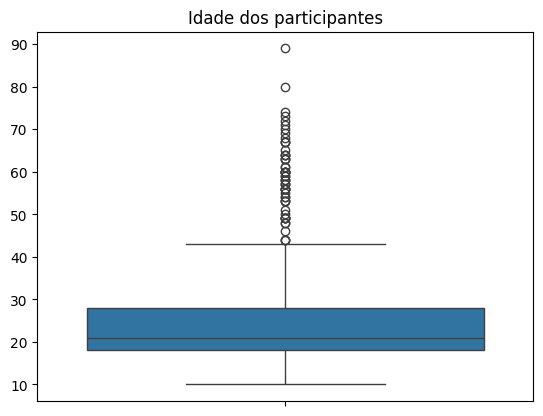

In [45]:
func.exibir_boxplot(dataset = df, coluna = "idade", orientacao = "v", titulo = "Idade dos participantes")

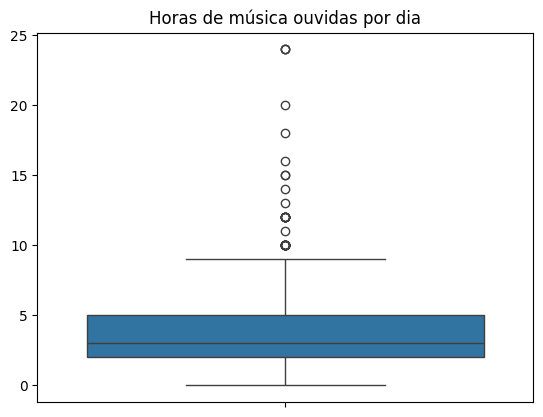

In [46]:
func.exibir_boxplot(df, "horas_por_dia", "v", "Horas de música ouvidas por dia")

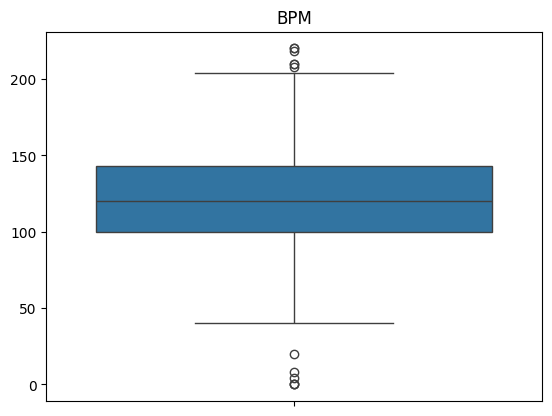

In [47]:
func.exibir_boxplot(df, "bpm", "v", "BPM")

## Exibindo vários boxplots de mesma categoria

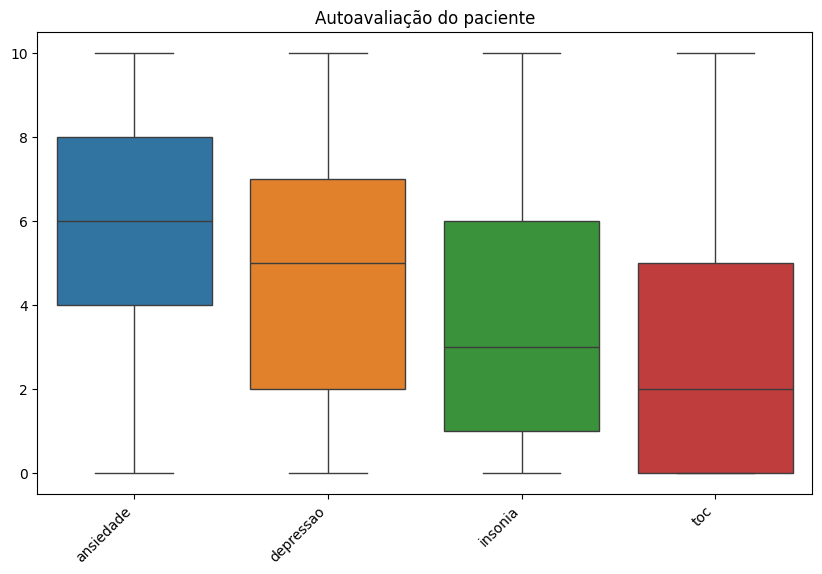

In [48]:
func.boxplot_de_varias(df, "Autoavaliação do paciente", 10, 6, "","ansiedade", "depressao", "insonia", "toc")

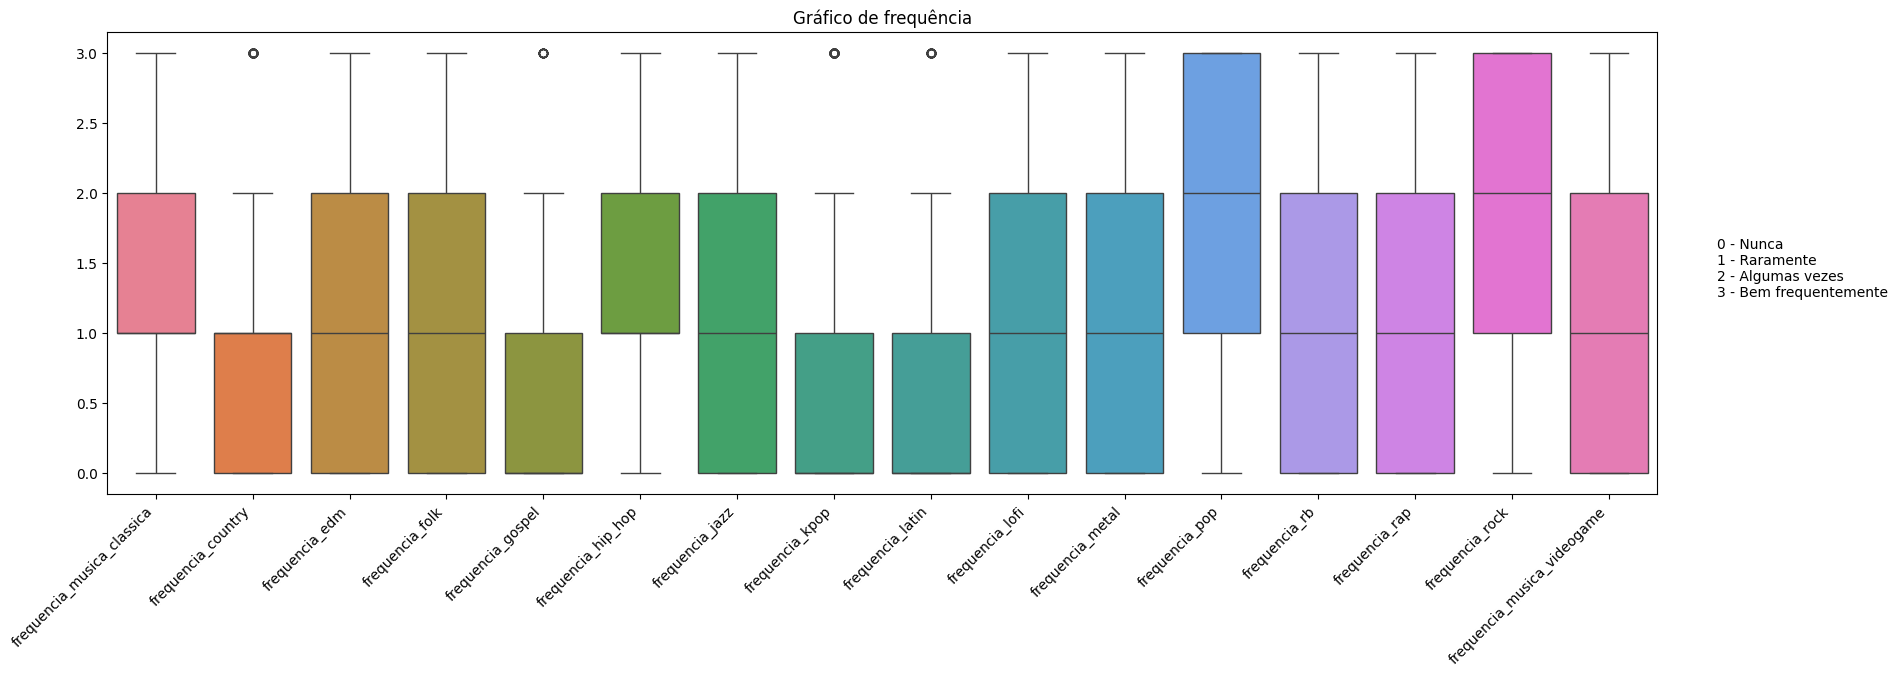

In [49]:
func.boxplot_de_varias(df, "Gráfico de frequência", 20, 6, legenda, "frequencia_musica_classica", "frequencia_country", "frequencia_edm", "frequencia_folk", "frequencia_gospel", "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop","frequencia_latin", "frequencia_lofi", "frequencia_metal", "frequencia_pop", "frequencia_rb", "frequencia_rap", "frequencia_rock", "frequencia_musica_videogame")

---
## Correlação

Aqui vamos realizar análises de correlação para poder plotar os gráficos

In [50]:
# Para melhor visualização dos dados.
df['minutos_por_dia'] = df['horas_por_dia'] * 60 

# Tratando alguns valores que estão fora do 'normal'.
mediana_minutos_dia = df['minutos_por_dia'].median()

df.loc[df['minutos_por_dia'] > 900, 'minutos_por_dia'] = mediana_minutos_dia

print(df['minutos_por_dia'].describe()) # Exibe um resumo da coluna 'minutos_por_dia'

count    736.000000
mean     205.561141
std      153.996701
min        0.000000
25%      120.000000
50%      180.000000
75%      240.000000
max      900.000000
Name: minutos_por_dia, dtype: float64


<Axes: xlabel='idade', ylabel='minutos_por_dia'>

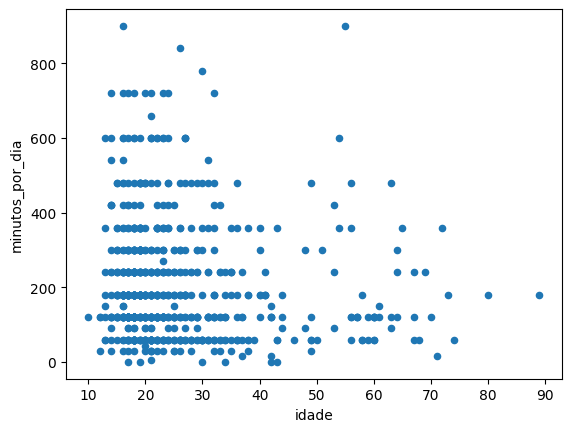

In [51]:
df.plot.scatter(x= 'idade', y = 'minutos_por_dia')

<Axes: xlabel='idade', ylabel='ansiedade'>

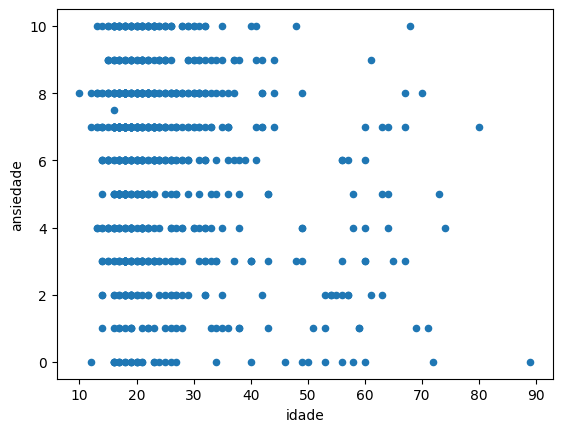

In [52]:
df.plot.scatter(x='idade', y='ansiedade')

<Axes: xlabel='bpm', ylabel='idade'>

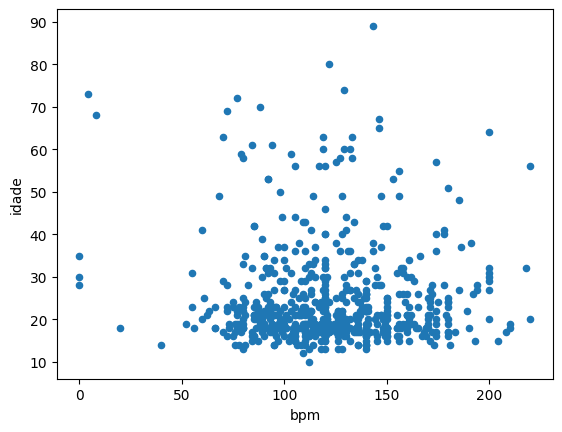

In [53]:
df.plot.scatter(x= 'bpm', y = 'idade')

<Axes: xlabel='bpm', ylabel='minutos_por_dia'>

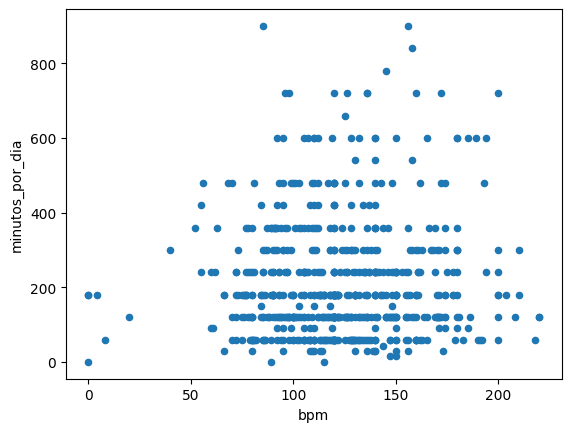

In [54]:
df.plot.scatter(x= 'bpm', y= 'minutos_por_dia')

## Histograma

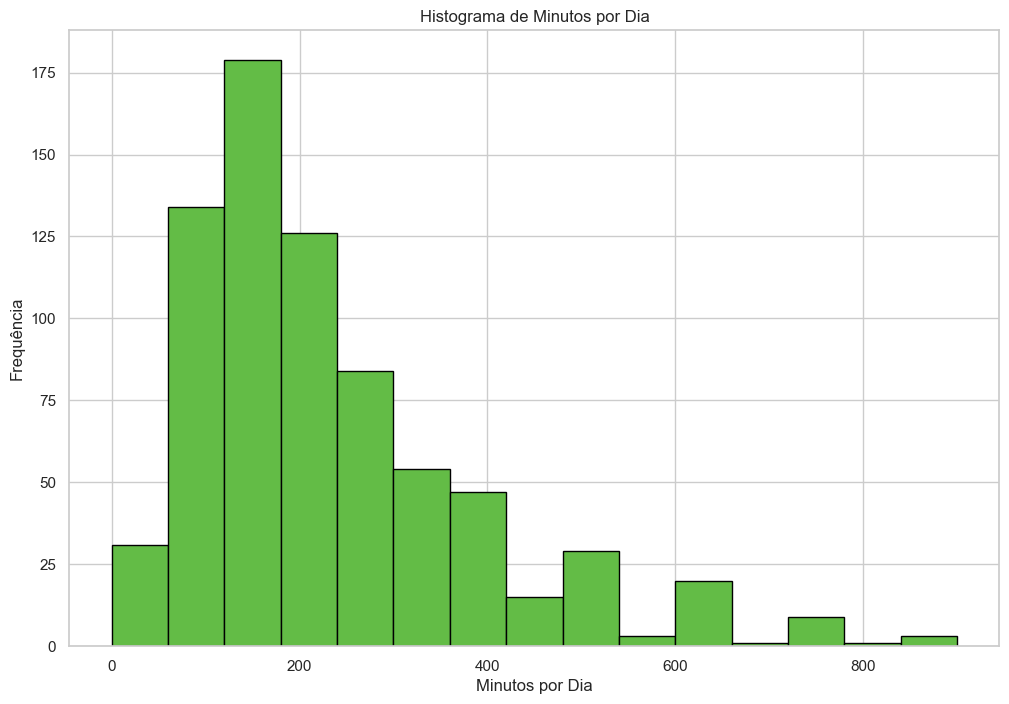

In [86]:
#Histograma de quantos minutos por dia as pessoas ouvem música

plt.figure(figsize=(12, 8))  # Define o tamanho da figura (largura, altura)
plt.hist(df['minutos_por_dia'], bins=15, color='#63bc46', edgecolor='black')  # Soft blue color

# Adiciona título e rótulos aos eixos
plt.title('Histograma de Minutos por Dia')
plt.xlabel('Minutos por Dia')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

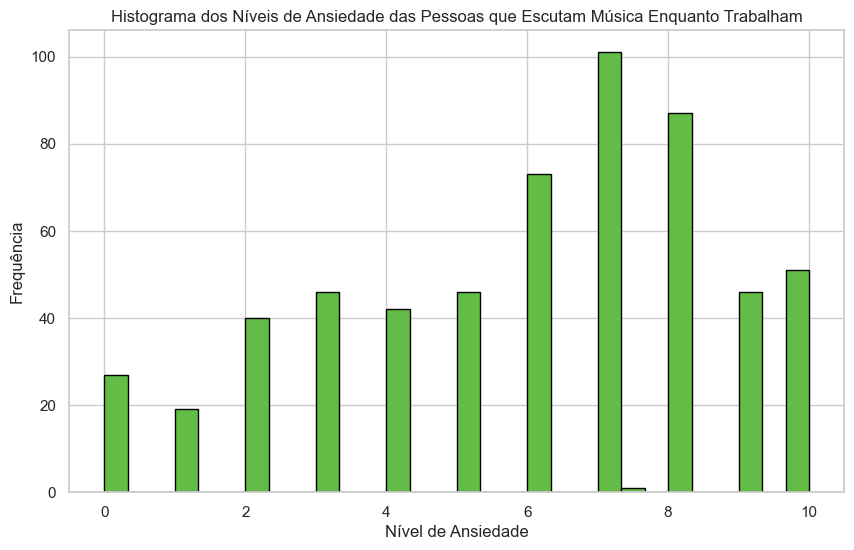

In [85]:
#Histograma das pessoas que escutam música enquanto trabalham e seus níveis de ansiedade.

df_musica_trabalho = df[df['enquanto_trabalha'] == 1]   #Filtra as pessoas que escutam música enquanto trabalham

plt.figure(figsize=(10, 6))  # Define o tamanho da figura (largura, altura)
plt.hist(df_musica_trabalho['ansiedade'], bins=30, color='#63bc46', edgecolor='black')

plt.title('Histograma dos Níveis de Ansiedade das Pessoas que Escutam Música Enquanto Trabalham')
plt.xlabel('Nível de Ansiedade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

---
## Relação entre Número de Músicas e Bpm

Vamos ver se existe alguma relação entre o número de Músicas e o BPM (Batidas por minuto) de cada uma delas

In [57]:
#tratamento da coluna bpm 
mediana_bpm = df[df['bpm'] >= 40]['bpm'].median()

df['bpm'] = np.where(df['bpm'] < 40, mediana_bpm, df['bpm'])

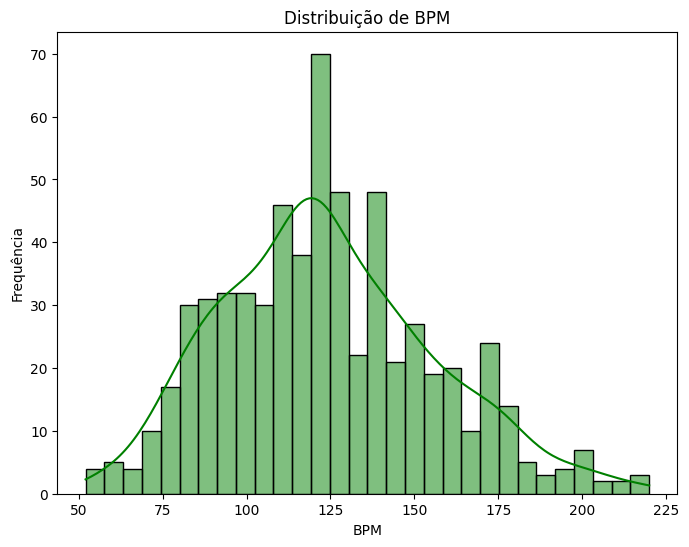

In [60]:
# Define the filter condition
df_filtered = df[df['bpm'] > 40]  # Example condition: bpm greater than 40

# Plotting the histogram
plt.figure(figsize=(8, 6))  
sns.histplot(df_filtered['bpm'], bins=30, kde=True, color='green')
plt.title('Distribuição de BPM')
plt.xlabel('BPM')
plt.ylabel('Frequência')
plt.show()

## Histogramas de níveis de sintomas de saúde mental: Número de participantes X Niveis de depressão, Insônia e TOC

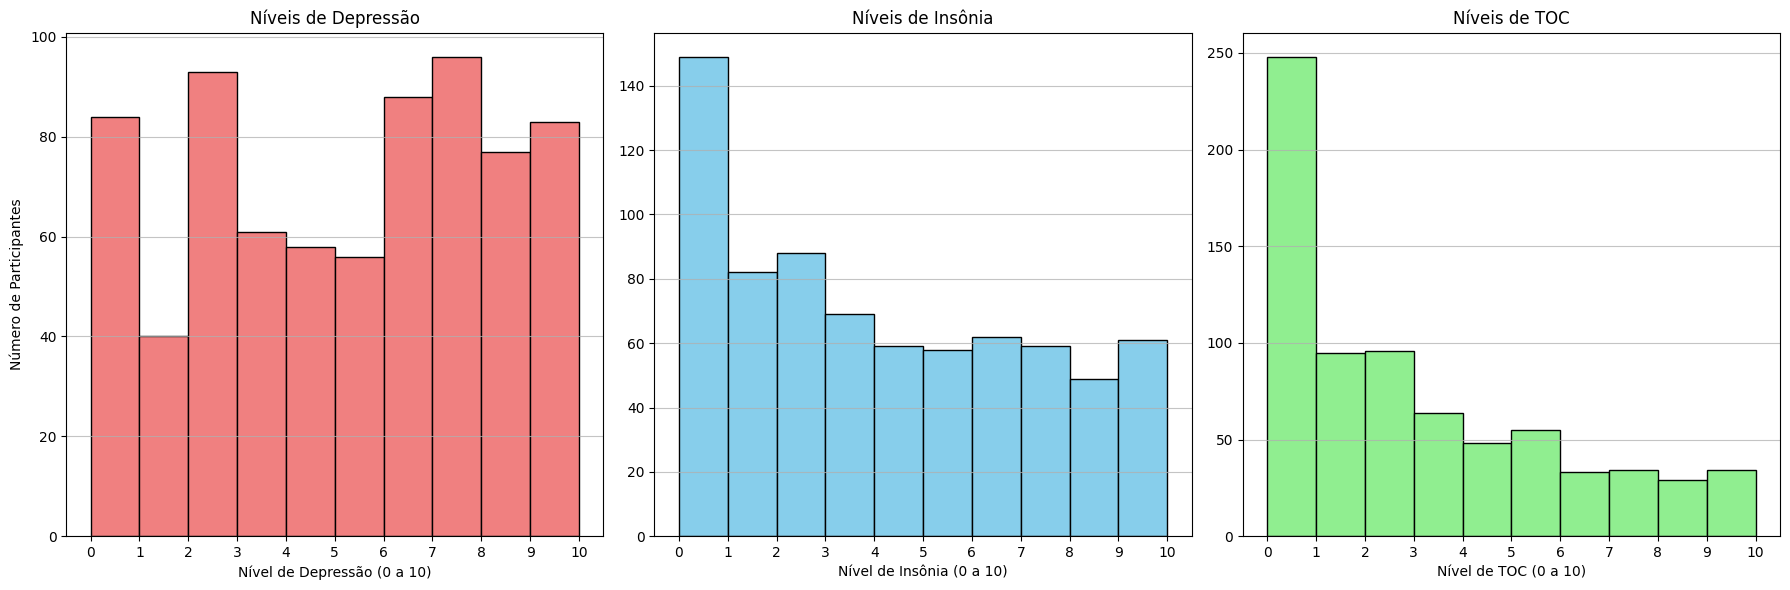

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=10, color='lightcoral', edgecolor='black')
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Número de Participantes')
axes[0].set_xticks(range(0, 11))  # Define as marcas no eixo X de 0 a 10
axes[0].grid(axis='y', alpha=0.75)

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=10, color='skyblue', edgecolor='black')
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11))
axes[1].grid(axis='y', alpha=0.75)

# Histograma para TOC
axes[2].hist(df['toc'], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11))
axes[2].grid(axis='y', alpha=0.75)

plt.tight_layout()

plt.show()

Alterações para melhorar a visualização dos histogramas 

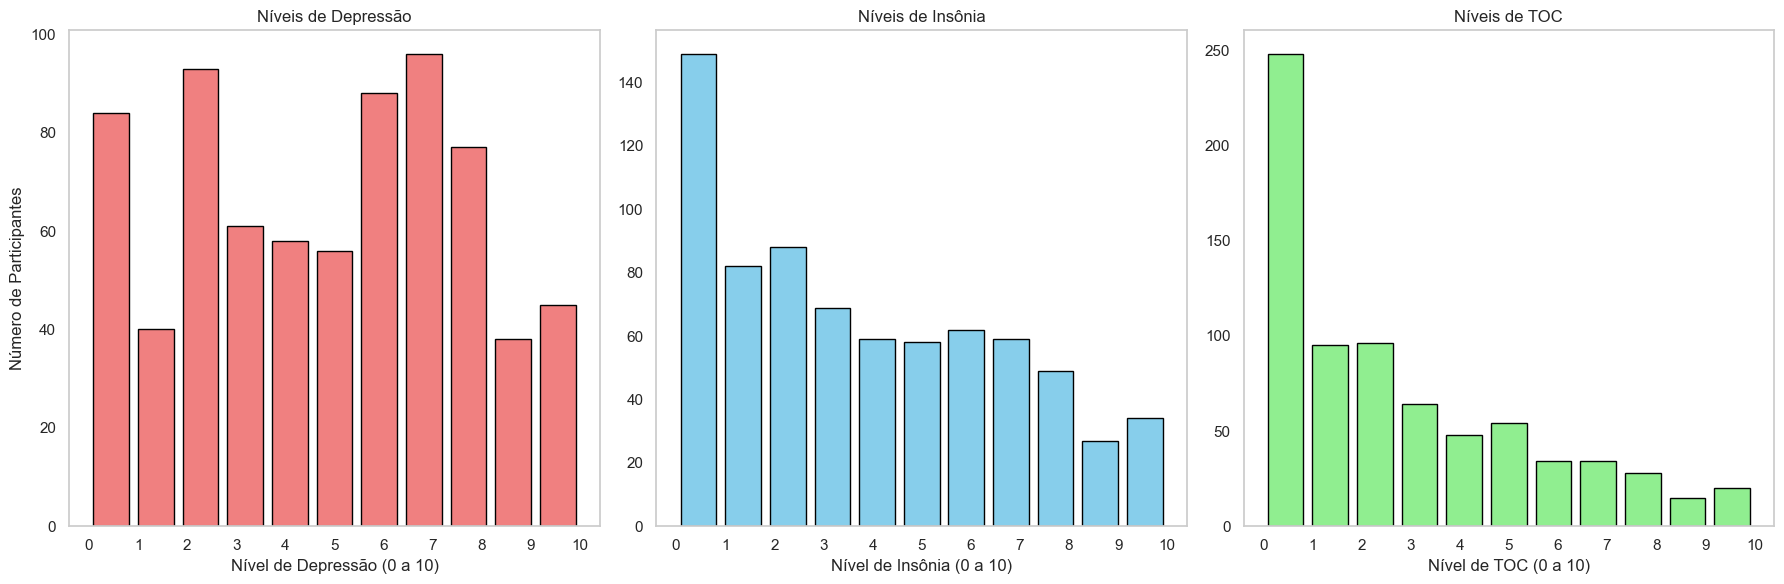

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Definir limite máximo comum para o eixo Y (frequência)
max_freq = max(df['depressao'].value_counts().max(), 
               df['insonia'].value_counts().max(), 
               df['toc'].value_counts().max())

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=11, color='lightcoral', edgecolor='black', rwidth=0.8)
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Número de Participantes')
axes[0].set_xticks(range(0, 11, 1))
axes[0].grid(False)  # Desligar linhas de grade

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=11, color='skyblue', edgecolor='black', rwidth=0.8)
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11, 1))
axes[1].grid(False)  # Desligar linhas de grade

# Histograma para TOC
axes[2].hist(df['toc'], bins=11, color='lightgreen', edgecolor='black', rwidth=0.8)
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11, 1))
axes[2].grid(False)  # Desligar linhas de grade

plt.tight_layout()

plt.show()

Como vemos, os valores de y estão fora de padrão, vamos converter o número de participantes em porcentagem para melhor entendimento dos dados

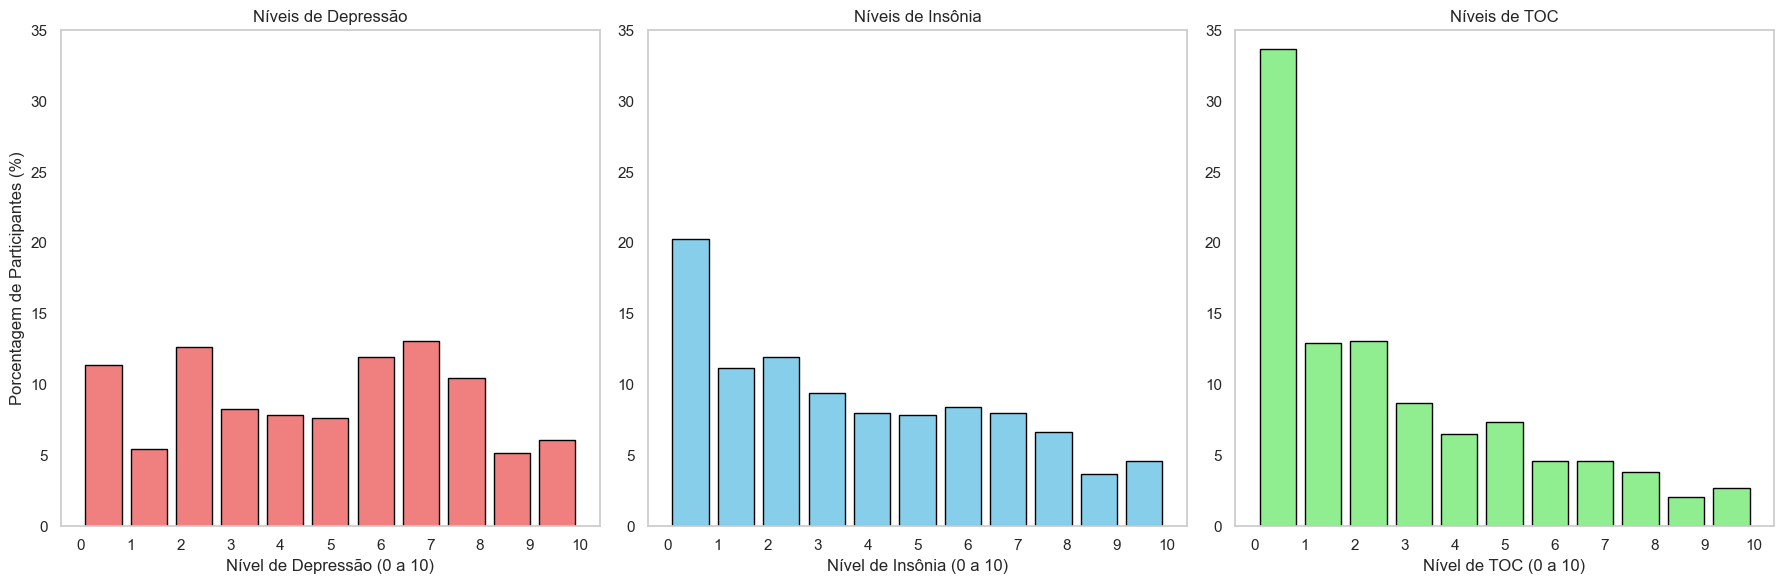

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Definir limite máximo fixo para o eixo Y (porcentagem)
max_y_limit = 35 # Atribuimos 35 ao vamor máximo de porcentagem para melhor visualização 

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=11, color='lightcoral', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Porcentagem de Participantes (%)')
axes[0].set_xticks(range(0, 11, 1))
axes[0].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[0].grid(False)

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=11, color='skyblue', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11, 1))
axes[1].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[1].grid(False)

# Histograma para TOC
axes[2].hist(df['toc'], bins=11, color='lightgreen', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11, 1))
axes[2].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[2].grid(False)

plt.tight_layout()

plt.show()

---
## Calculando Gêneros Mais Escutados 

Vamos ver quais foram os gêneros mais escutados com base nos dados dispostos.

C:\Users\User\AppData\Local\Temp\ipykernel_53884\361076517.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequencia', y='Genero', data=df_generos, palette='viridis')


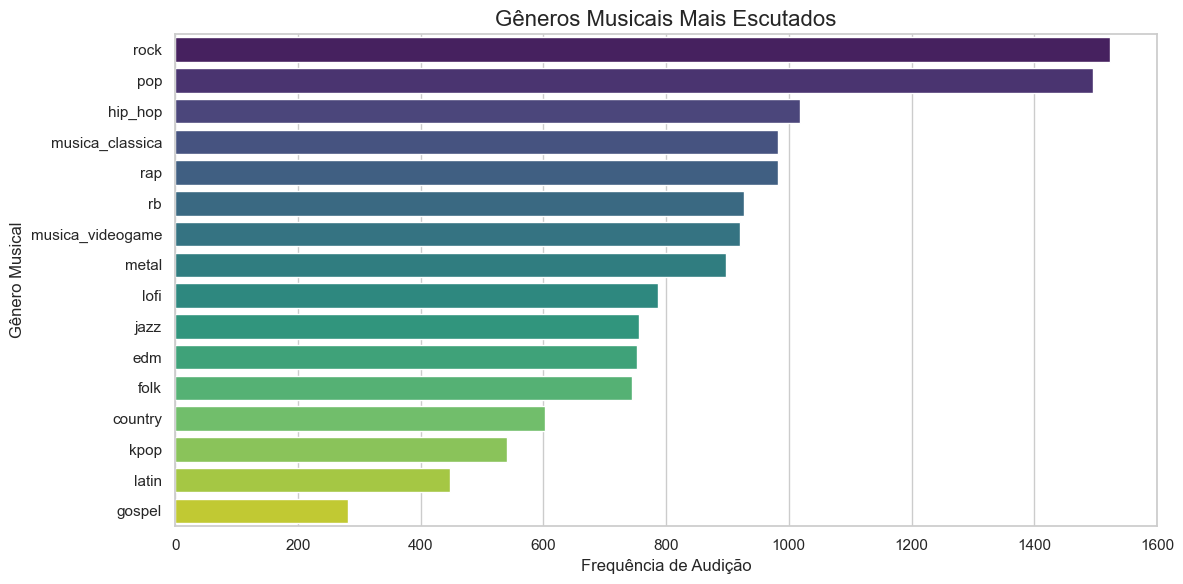

In [67]:
sns.set(style="whitegrid")

# Criando uma lista de gêneros e suas respectivas frequências
generos = ['musica_classica', 'country', 'edm', 'folk', 'gospel', 'hip_hop', 'jazz', 'kpop', 'latin', 
           'lofi', 'metal', 'pop', 'rb', 'rap', 'rock', 'musica_videogame']

# Calculando a soma das frequências para cada gênero
frequencias = df[['frequencia_musica_classica', 'frequencia_country', 'frequencia_edm', 'frequencia_folk', 
                  'frequencia_gospel', 'frequencia_hip_hop', 'frequencia_jazz', 'frequencia_kpop', 
                  'frequencia_latin', 'frequencia_lofi', 'frequencia_metal', 'frequencia_pop', 
                  'frequencia_rb', 'frequencia_rap', 'frequencia_rock', 'frequencia_musica_videogame']].sum()

# Criando um DataFrame com os gêneros e suas frequências
df_generos = pd.DataFrame({'Genero': generos, 'Frequencia': frequencias}).sort_values(by='Frequencia', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequencia', y='Genero', data=df_generos, palette='viridis')

plt.title('Gêneros Musicais Mais Escutados', fontsize=16)
plt.xlabel('Frequência de Audição', fontsize=12)
plt.ylabel('Gênero Musical', fontsize=12)

plt.tight_layout()
plt.show()


### Relacionando os 5 Gêneros mais Escutados com Sintomas de Saúde Mental 

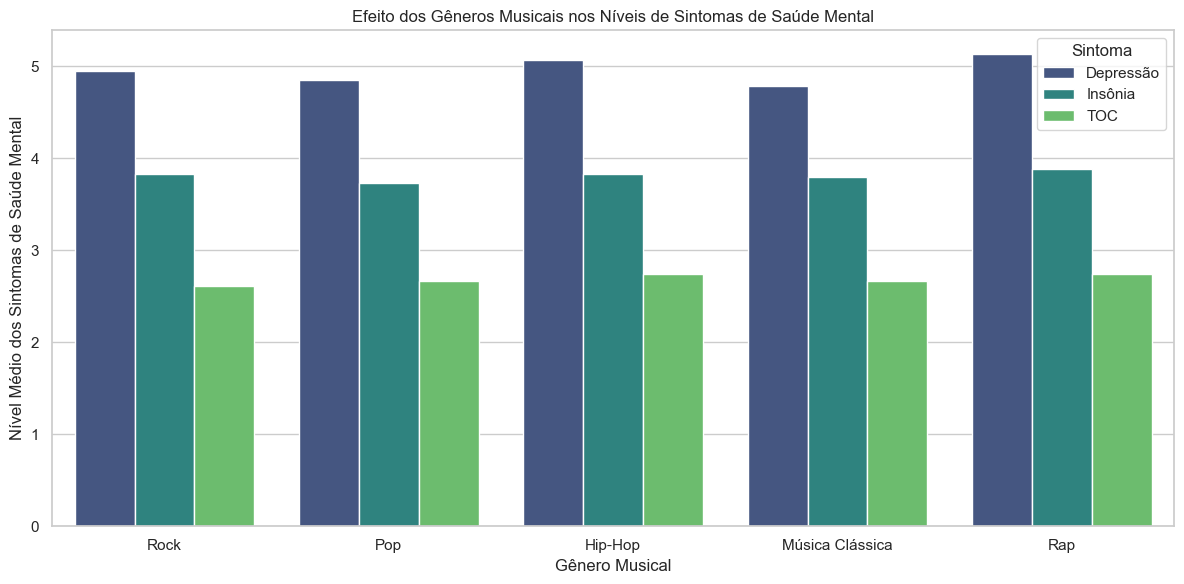

In [92]:
sns.set(style="whitegrid")

# Reestruturando os dados: média dos sintomas de saúde mental para diferentes níveis de frequência dos gêneros
df_generos = df[['frequencia_rock', 'frequencia_pop', 'frequencia_hip_hop', 'frequencia_musica_classica', 'frequencia_rap', 'depressao', 'insonia', 'toc']]

# Calculando a média dos sintomas de saúde mental para cada gênero musical
df_efeitos = pd.DataFrame({
    'Gênero': ['Rock', 'Pop', 'Hip-Hop', 'Música Clássica', 'Rap'],
    'Depressão': [
        df.loc[df['frequencia_rock'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'depressao'].mean()
    ],
    'Insônia': [
        df.loc[df['frequencia_rock'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'insonia'].mean()
    ],
    'TOC': [
        df.loc[df['frequencia_rock'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'toc'].mean()
    ]
})

# Reorganizando os dados para formato longo (necessário para o gráfico de barras)
df_melted = df_efeitos.melt(id_vars='Gênero', var_name='Sintoma', value_name='Nível Médio')

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Gênero', y='Nível Médio', hue='Sintoma', data=df_melted, palette='viridis')

# Configurando o gráfico
plt.title('Efeito dos Gêneros Musicais nos Níveis de Sintomas de Saúde Mental')
plt.xlabel('Gênero Musical')
plt.ylabel('Nível Médio dos Sintomas de Saúde Mental')
plt.legend(title='Sintoma')

plt.tight_layout()
plt.show()

Percebemos com a análise acima que os níveis médios de sintomas de saúde mental de todos os gêneros musicais são parecidos, o que indica que possivelmente a música escutada por pessoas com depressão, insônia e TOC não influenciam tanto assim nesses sintomas de primeira instância.